<a href="https://colab.research.google.com/github/PaletteofDesign/regression_metrics/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignments: Linear Regression Exercise (Practice) and Regression Metrics (Practice)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
f = '/content/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(f)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [11]:
df.isna().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes

CRIM       float64
NOX        float64
RM         float64
AGE        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


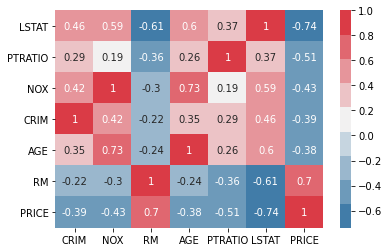

In [9]:
sn.heatmap(df.corr().sort_values(by=['PRICE']), cmap=sn.diverging_palette(240,10,n=9), annot=True)

In [24]:
n_df = df.loc[:,['PTRATIO', 'LSTAT', 'RM', 'PRICE']]
features

,PTRATIO,LSTAT,RM,PRICE
0,15.3,4.98,6.575,24.0
1,17.8,9.14,6.421,21.6
2,17.8,4.03,7.185,34.7
3,18.7,2.94,6.998,33.4
4,18.7,5.33,7.147,36.2
...,...,...,...,...
501,21.0,9.67,6.593,22.4
502,21.0,9.08,6.120,20.6
503,21.0,5.64,6.976,23.9
504,21.0,6.48,6.794,22.0


In [25]:
df.shape

(506, 7)

In [26]:
n_df.shape

(506, 4)

In [27]:
n_df.isna().sum()

PTRATIO    0
LSTAT      0
RM         0
PRICE      0
dtype: int64

In [29]:
y = n_df.loc[:, 'PRICE']

In [32]:
X = n_df.drop(columns='PRICE')

In [33]:
X

,PTRATIO,LSTAT,RM
0,15.3,4.98,6.575
1,17.8,9.14,6.421
2,17.8,4.03,7.185
3,18.7,2.94,6.998
4,18.7,5.33,7.147
...,...,...,...
501,21.0,9.67,6.593
502,21.0,9.08,6.120
503,21.0,5.64,6.976
504,21.0,6.48,6.794


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
preds = reg.predict(X)

In [38]:
reg.score(X,y)

0.6786241601613111

In [39]:
r2_score(y, preds)

0.6786241601613111

In [42]:
train_preds = reg.predict(X_train)
train_preds

array([31.55198346, 24.07583816, 37.85994783, 10.54794541, 27.23700741,
       18.98322765, 19.73603521, 12.10892588, 21.89927303, 22.25938498,
       33.03167761, 31.36317064, 16.4508588 , 17.68091986, 30.60088931,
       23.85792912, 11.94510636,  9.0852694 , 23.78940424, 23.91480291,
       17.53065543, 13.90258272, 39.12212644, 19.55307683, 18.5919267 ,
       27.21764876, 23.00294929, 21.7256635 , 22.05847972, 16.15806328,
       24.20181278, 31.08040676, 12.28755841, 22.26439029, 18.63566401,
       19.65456891, 25.18696828, 25.5980893 , 22.30762508, 41.00885176,
       17.38473787, 16.80163755, 21.33922781, 19.24174572, 21.3317895 ,
       22.09771508, 33.61146945, 20.62115083, 19.72614838, 24.26432317,
       29.62733827, 35.19073788, 26.35743614, 10.27641023,  2.03748727,
       10.6480918 , 17.75253069, 30.62994623, 28.2069968 , 20.26880064,
        1.82285733, 27.81023884, 22.88647345, 19.8784895 , 27.07139175,
       17.20935179, 16.99977599, 11.49310282, 31.87651945, 27.37

In [44]:
test_preds = reg.predict(X_test)
test_preds

array([26.91893445, 30.68313519, 16.54282287, 24.92689907, 18.32503734,
       22.67041374, 17.66481769, 12.89917682, 20.53393375, 19.71770497,
       19.92777371, 21.75283875, -0.9736712 , 22.24662086, 19.38597339,
       24.61689976, 17.28412644,  4.29307993, 39.02538375, 17.32755731,
       25.66369918, 27.34407019, 11.89572915, 23.26274713, 17.90878478,
       13.89915017, 22.48275059, 19.44778358, 18.29249657, 18.79712719,
       19.87721703, 25.22404345, 25.10272081, 18.15150303, 14.68169055,
       21.6352163 , 32.13917258, 20.66382567, 20.2545132 , 24.58462735,
       12.94738509, 28.0622377 , 39.51558142, 18.75078352, 25.93809811,
       15.77952042, 14.27171827, 25.83016042, 18.29840219, 31.16835679,
       23.96543164, 33.53821046, 16.0514508 , 25.34832989, 38.39100676,
       22.21814871, 18.36166238, 29.7734286 , 24.69699793, 15.54371209,
       25.33299955, 31.88907883, 29.80758768, 16.97366602, 28.10262991,
       12.18308817, 19.19649144, 25.49703152, 28.8438893 , 15.88

In [50]:
np.sqrt(mean_squared_error(y_train, train_preds))

5.26747648584123

In [51]:
np.sqrt(mean_squared_error(y_test, test_preds))

5.029154670871049

In [52]:
mean_squared_error(y_train, train_preds)

27.746308528890275

In [53]:
mean_squared_error(y_test, test_preds)

25.29239670354409

In [47]:
mean_absolute_error(y_train, train_preds)

3.7317077907708147

In [48]:
mean_absolute_error(y_test, test_preds)

3.3734673850270718